In [1]:
import pandas as pd
import matplotlib.pyplot as plt

tarpath = r"maker.liquidation.debt.20220403.csv"
target = pd.read_csv(tarpath)


In [2]:
target.head()
target.shape


(522, 15)

In [3]:
target.debt_auction_id


0        1
1        1
2        1
3        1
4        1
      ... 
517    106
518    106
519    106
520    106
521    106
Name: debt_auction_id, Length: 522, dtype: int64

In [4]:
target.deal_time
target.dent_time
target.kick_time
# type(target.kick_time[0])


0      2020/03/19 14:38:03
1      2020/03/19 14:38:03
2      2020/03/19 14:38:03
3      2020/03/19 14:38:03
4      2020/03/19 14:38:03
              ...         
517    2020/03/27 16:03:24
518    2020/03/27 16:03:24
519    2020/03/27 16:03:24
520    2020/03/27 16:03:24
521    2020/03/27 16:03:24
Name: kick_time, Length: 522, dtype: object

In [5]:
id = target.debt_auction_id
dealTime = pd.to_datetime(target.deal_time, format="%Y/%m/%d %H:%M:%S")

kickTime = pd.to_datetime(target.kick_time, format="%Y/%m/%d %H:%M:%S")
# .dt.strftime("%Y-%m-%d")
dentTime = pd.to_datetime(target.dent_time, format="%Y/%m/%d %H:%M:%S")
# .dt.strftime("%Y-%m-%d")
# dealTime[0] - dealTime[1]
dentLot = target.dent_lot
dentLot


0      242.000000
1      234.951456
2      222.222222
3      215.749730
4      209.465758
          ...    
517    183.533784
518    178.188140
519    172.998194
520    167.000000
521     16.182300
Name: dent_lot, Length: 522, dtype: float64

In [51]:
lastid = 1
lastindex = 0

result = []

import numpy as np

for index in range(len(id)):
    if id[index] != lastid or index == len(id) - 1:
        # kick_time = kickTime[lastindex].strftime("%Y-%m-%d")

        deal_kick = dealTime[index - 1] - kickTime[lastindex]
        deal_kick /= np.timedelta64(1, "h")

        # deal_dent = dealTime[index - 1] - dentTime[lastindex]
        # deal_dent /= np.timedelta64(1, "h")

        lot_start = dentLot[lastindex]
        lot_ent = dentLot[index - 1]
        lot_differ = lot_start - lot_ent

        result.append((lastid, deal_kick, lot_differ, lot_ent))

        lastid = id[index]
        lastindex = index
        # print(lastid, lastindex)

result = pd.DataFrame(
    result,
    columns=["id", "deal_kick", "lot_differ", "lot_end"],
)

print(len(result))

result.set_index("id", drop=True, inplace=True)

result


106


,deal_kick,lot_differ,lot_end
id,,,
1,30.366944,69.332564,172.667436
2,30.467500,69.348066,172.651934
3,30.051667,69.332564,172.667436
4,20.377500,52.968210,188.679245
5,20.288333,53.320755,188.679245
...,...,...,...
102,33.546111,75.340633,166.659367
103,19.223889,60.181818,181.818182
104,19.088333,60.181818,181.818182


In [30]:
# result = result.groupby(level=0).mean()
# result

,deal-kick,deal-dent,lot_differ
kick_time,,,
2020-03-19,18.250285,18.237604,56.247122
2020-03-22,8.475354,8.234819,15.478621
2020-03-23,12.088148,12.088148,26.891144
2020-03-27,20.682764,20.357639,66.514793


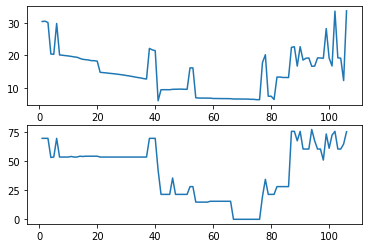

In [61]:
fig, (ax0, ax1) = plt.subplots(nrows=2)
ax0.plot(
    result.index, result.deal_kick
)  # color="darkorange", marker="o", linestyle="dashed")


ax1.plot(result.index, result.lot_differ)
